## Bike Sharing Demand _ 박일광
### 


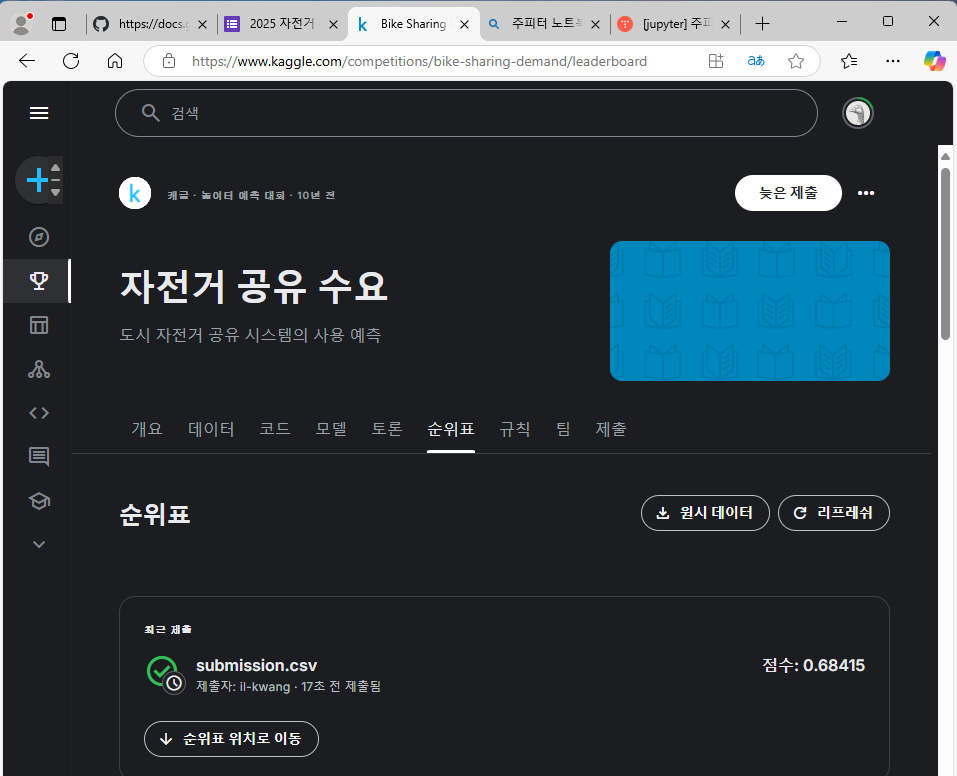

In [12]:
from IPython.display import Image
from IPython.display import HTML
import base64
image_path = "C:/Users/302/Documents/박일광_공유자전거수요_제출사진.png"
# Base64로 인코딩
with open(image_path, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')


# Base64 문자열을 HTML로 삽입
html_code = f'<img src="data:image/png;base64,{encoded_string}" />'
display(HTML(html_code))

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# 한글 폰트 적용
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font', family=font_name)

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# https://www.kaggle.com/competitions/bike-sharing-demand/data
bike_df = pd.read_csv('train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


| 열 이름       | 데이터 개수 | 데이터 타입 | 설명                                   |
|---------------|-------------|-------------|----------------------------------------|
| `datetime`    | 10886       | object      | 날짜                                   |
| `season`      | 10886       | int64       | 계절 (1: 봄, 2: 여름, 3: 가을, 4: 겨울)|
| `holiday`     | 10886       | int64       | 휴일 여부 (1: 휴일, 0: 휴일 아님)      |
| `workingday`  | 10886       | int64       | 평일 여부 (1: 평일, 0: 평일 아님)      |
| `weather`     | 10886       | int64       | 날씨 상태 (1: 맑음, 2: 흐림, 3: 약한 눈/비, 4: 심한 눈/비) |
| `temp`        | 10886       | float64     | 온도                                   |
| `atemp`       | 10886       | float64     | 체감 온도                              |
| `humidity`    | 10886       | int64       | 습도                                   |
| `windspeed`   | 10886       | float64     | 풍속                                   |
| `casual`      | 10886       | int64       | 비회원 렌탈 횟수                       |
| `registered`  | 10886       | int64       | 회원 렌탈 횟수                         |
| `count`       | 10886       | int64       | 총 대여 횟수                           |


 자전거 빌려 타기에 뭐가 좋을지 날씨가 괜찮고 일하는 날보다 평일이 많지는 않을까
 의문1. 자전거 타기 좋은 날씨? 는 좋을수록 당연히 많이 탐
 의문2. 휴무일과 평일의 자전거 타기 어느쪽이 더 좋을지 <-> 크게 상관없었음

In [14]:
# 문자열을 datetime 타입으로 변경.
print(type(bike_df['datetime']))
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime) # 문자열로 되있다면 관련 로그가 출력되지 않는다.
# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

<class 'pandas.core.series.Series'>


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [15]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

In [16]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


C:\Users\302\AppData\Local\Temp\ipykernel_10724\2078585566.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='count', data=season_avg_rentals, palette='coolwarm')


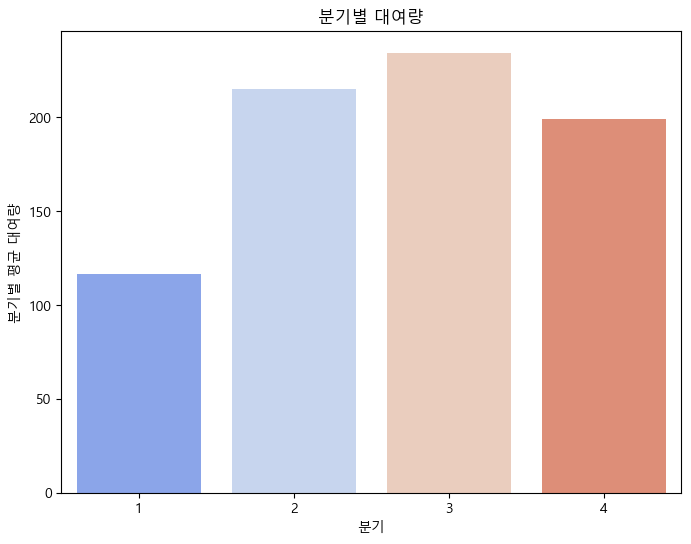

In [17]:
# season별 평균 대여량 계산
season_avg_rentals = bike_df.groupby('season')['count'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='count', data=season_avg_rentals, palette='coolwarm')
plt.title('분기별 대여량')
plt.xlabel('분기')
plt.ylabel('분기별 평균 대여량')
plt.show()

분기별 실적으로 야외에서 진행되는 자전거 대여를 나눈기에 적절하지 않아 보임

C:\Users\302\AppData\Local\Temp\ipykernel_10724\572571707.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='new_season', y='count', data=season_counts, order=['봄', '여름', '가을', '겨울'], palette=custom_palette)


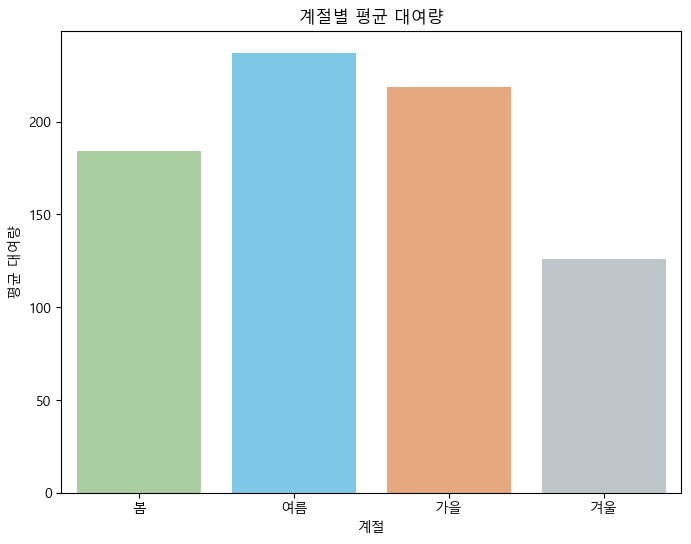

In [18]:
# month를 기준으로 계절로 변환환

# 보편적적 기준으로 계절 정의
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

bike_df['new_season'] = bike_df['month'].apply(get_season)

# 계절느낌 나는 색상
custom_palette = ['#A7D49B', '#6ECFF6', '#F6A56E', '#BCC6CC']  # 봄, 여름, 가을, 겨울 색상

# 계절별 대여량 평균 계산
season_counts = bike_df.groupby('new_season')['count'].mean().reset_index()

# 계절별 대여량 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='new_season', y='count', data=season_counts, order=['봄', '여름', '가을', '겨울'], palette=custom_palette)
plt.title('계절별 평균 대여량')
plt.xlabel('계절')
plt.ylabel('평균 대여량')
plt.show()




분기별 대여량보다 내가 느끼기엔 좀 더 설득력 있어보임

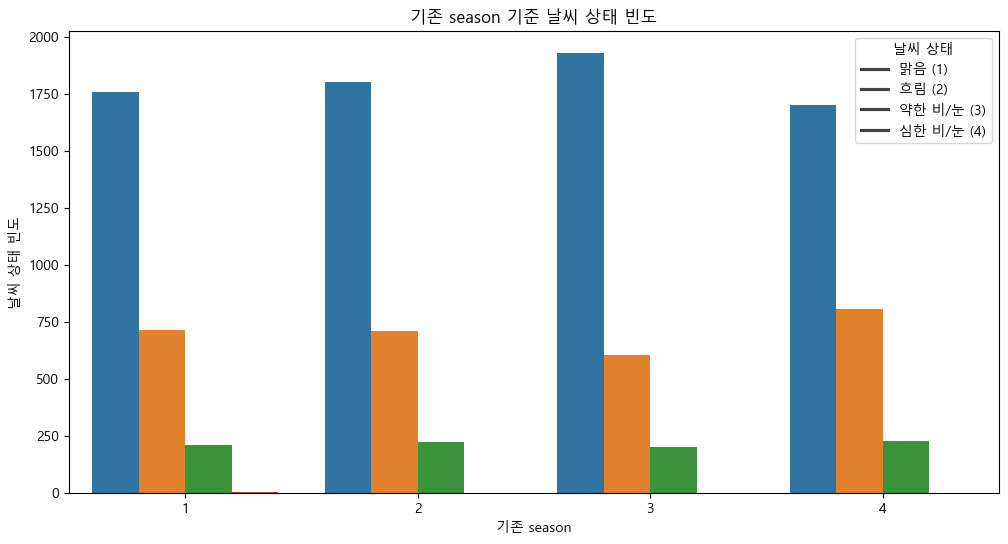

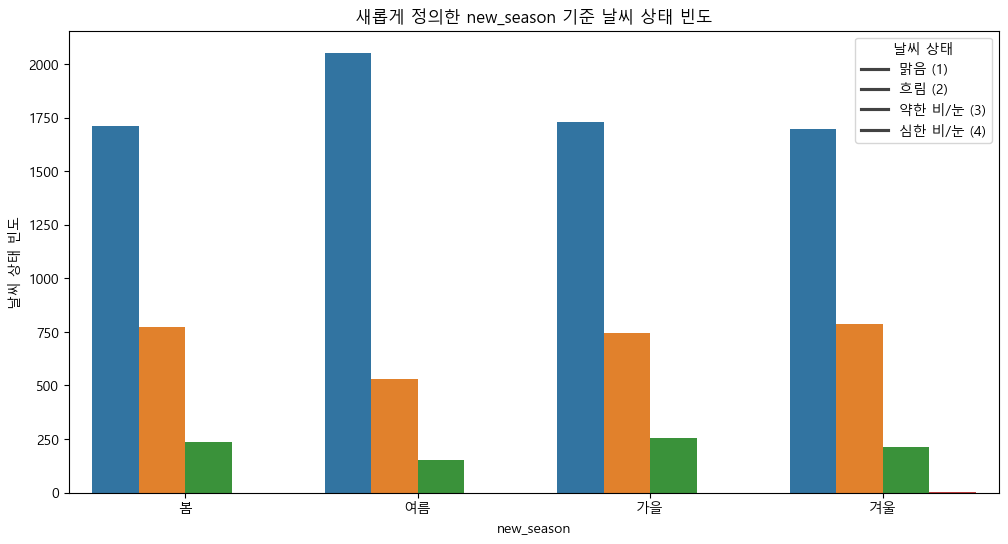

In [19]:
# 기존 season을 기준으로 날씨 상태 빈도 계산
season_weather_counts = bike_df.groupby(['season', 'weather']).size().reset_index(name='count')

# 새롭게 정의한 new_season을 기준으로 날씨 상태 빈도 계산
new_season_weather_counts = bike_df.groupby(['new_season', 'weather']).size().reset_index(name='count')

# 기존 season 기준 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='count', hue='weather', data=season_weather_counts, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('기존 season 기준 날씨 상태 빈도')
plt.xlabel('기존 season')
plt.ylabel('날씨 상태 빈도')
plt.legend(title='날씨 상태', labels=['맑음 (1)', '흐림 (2)', '약한 비/눈 (3)', '심한 비/눈 (4)'])
plt.show()

# 새롭게 정의한 new_season 기준 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='new_season', y='count', hue='weather', data=new_season_weather_counts, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], order=['봄', '여름', '가을', '겨울'])
plt.title('새롭게 정의한 new_season 기준 날씨 상태 빈도')
plt.xlabel('new_season')
plt.ylabel('날씨 상태 빈도')
plt.legend(title='날씨 상태', labels=['맑음 (1)', '흐림 (2)', '약한 비/눈 (3)', '심한 비/눈 (4)'])
plt.show()

날씨로 분기를 구분하기 힘듬 보편적으로 날씨가 거의 일정함 날씨보다 온도를 기준으로 확인하는게 좋아보임


C:\Users\302\AppData\Local\Temp\ipykernel_10724\3358998599.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='temp', data=season_temp_avg, palette=['#FF9999', '#FFCC99', '#99CCFF', '#CC99FF'])


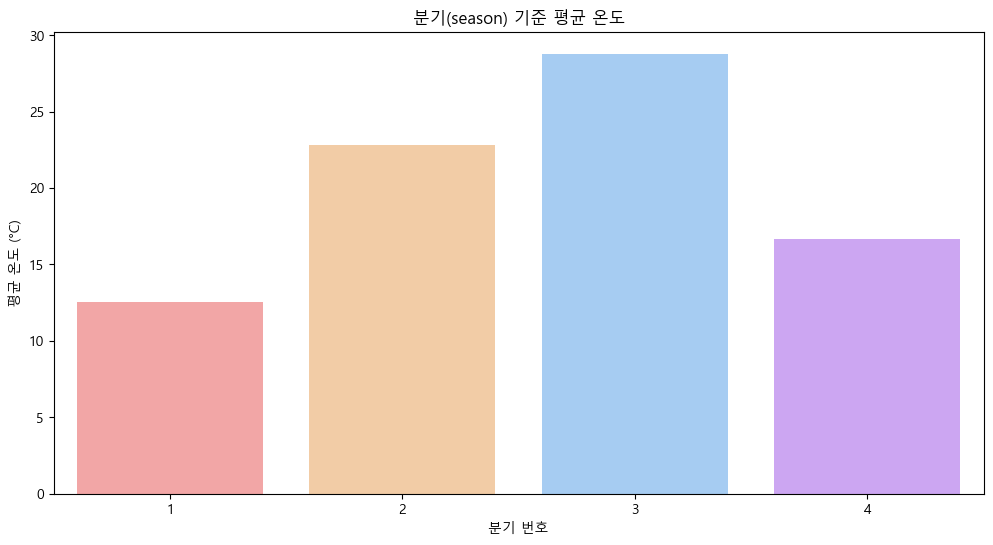

C:\Users\302\AppData\Local\Temp\ipykernel_10724\3358998599.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='new_season', y='temp', data=new_season_temp_avg, palette=['#A7D49B', '#6ECFF6', '#F6A56E', '#BCC6CC'], order=['봄', '여름', '가을', '겨울'])


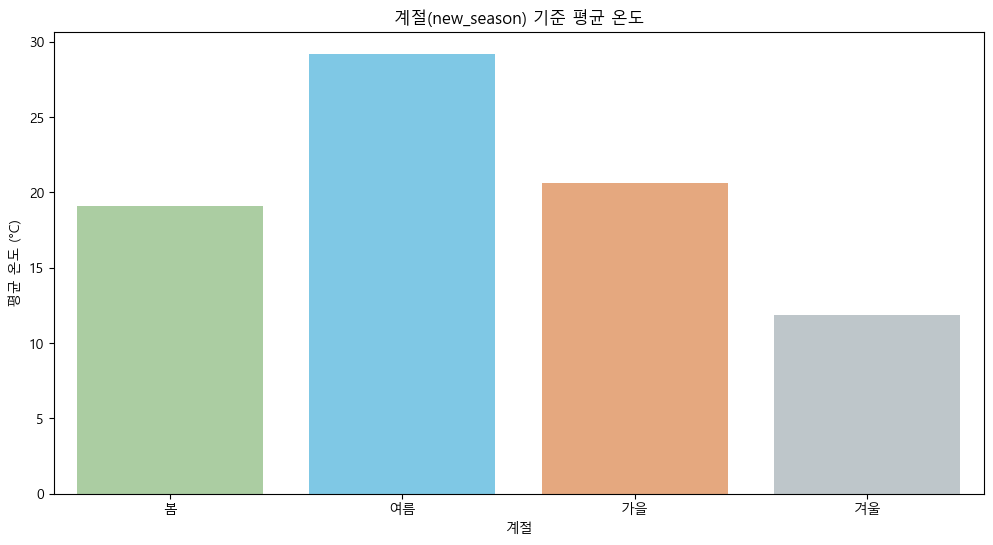

In [20]:
# 기존 season을 기준으로 평균 온도 계산
season_temp_avg = bike_df.groupby('season')['temp'].mean().reset_index()

# 새롭게 정의한 new_season을 기준으로 평균 온도 계산
new_season_temp_avg = bike_df.groupby('new_season')['temp'].mean().reset_index()

# 분기(season) 기준 그래프 (분기 번호로 표시)
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='temp', data=season_temp_avg, palette=['#FF9999', '#FFCC99', '#99CCFF', '#CC99FF'])
plt.title('분기(season) 기준 평균 온도')
plt.xlabel('분기 번호')
plt.ylabel('평균 온도 (°C)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['1', '2', '3', '4'])  # 분기 번호로 레이블 설정
plt.show()

# 계절(new_season) 기준 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='new_season', y='temp', data=new_season_temp_avg, palette=['#A7D49B', '#6ECFF6', '#F6A56E', '#BCC6CC'], order=['봄', '여름', '가을', '겨울'])
plt.title('계절(new_season) 기준 평균 온도')
plt.xlabel('계절')
plt.ylabel('평균 온도 (°C)')
plt.show()

온도와 대여량은 비례하게 움직인다.

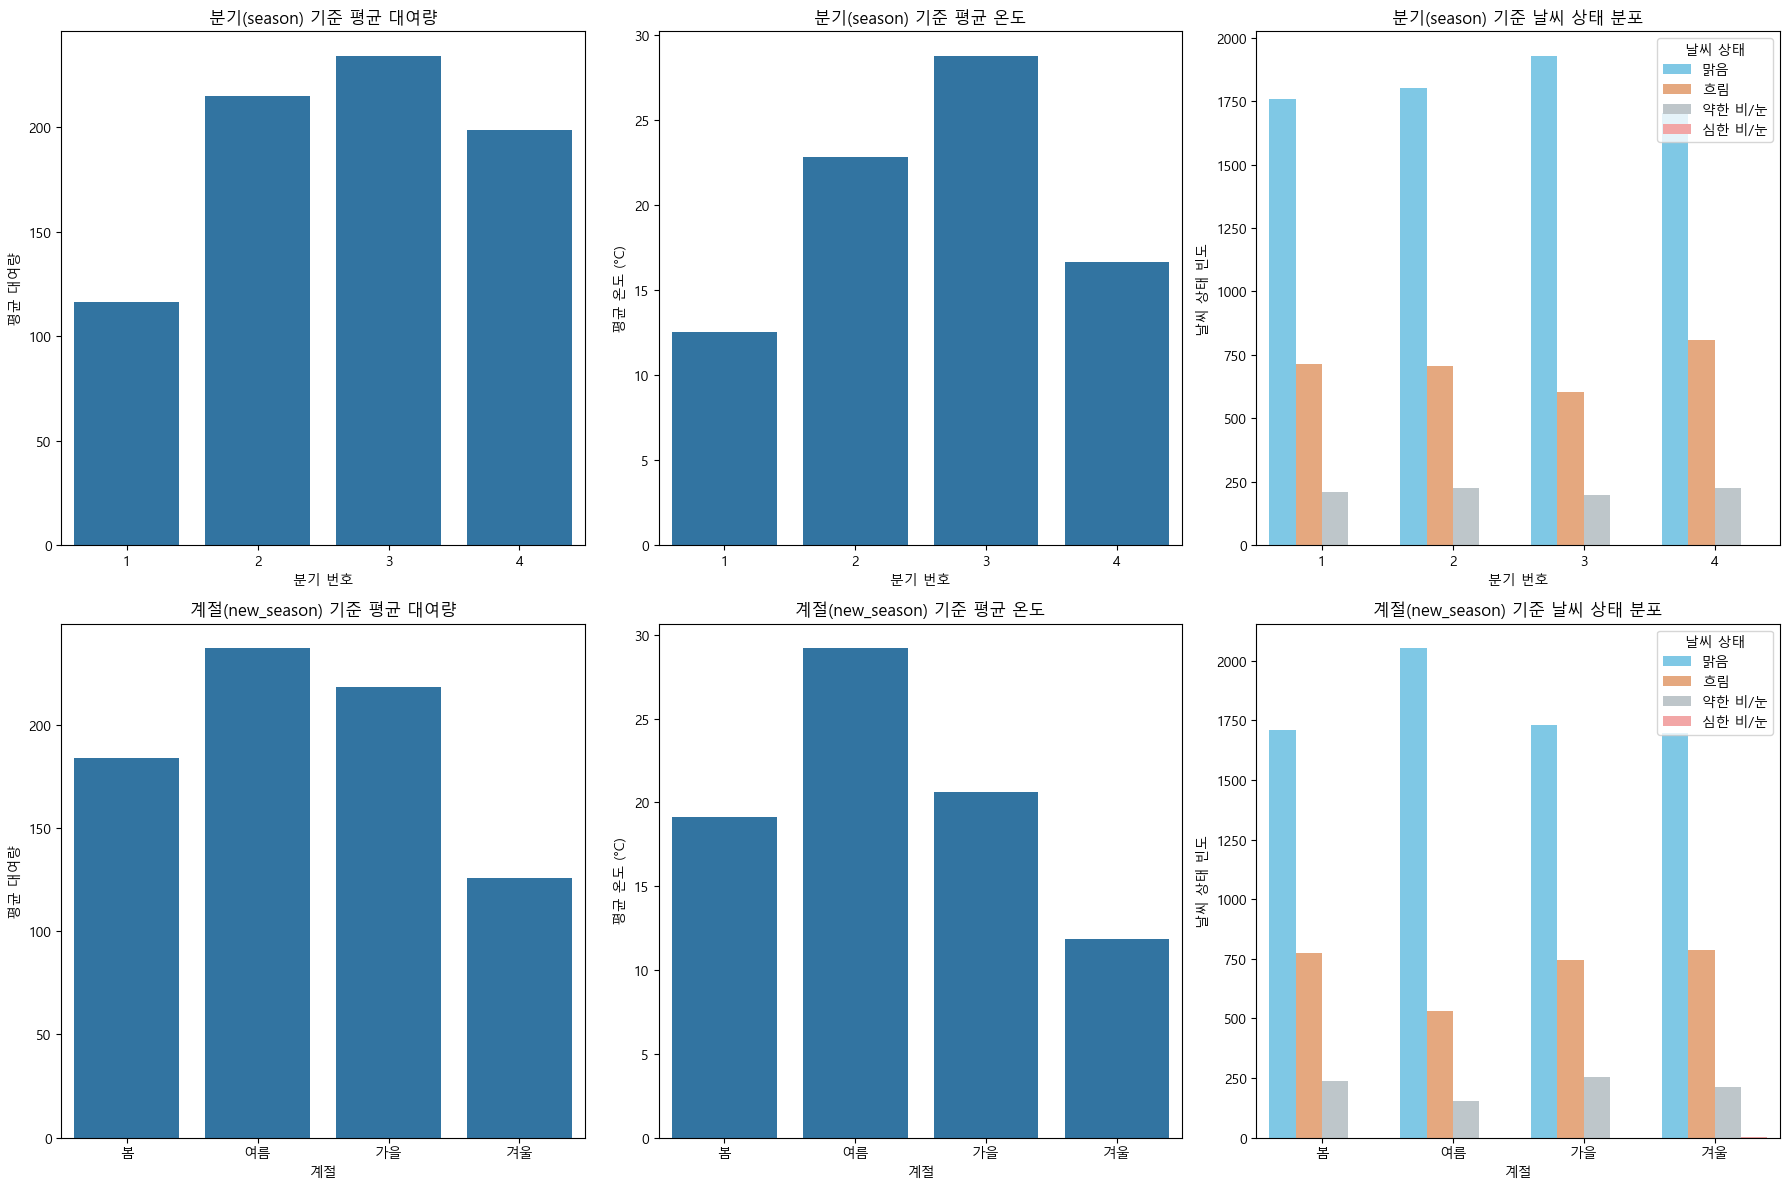

In [21]:
# 분기(season) 기준 평균 대여량과 평균 온도 계산
season_count_avg = bike_df.groupby('season')['count'].mean().reset_index()
season_temp_avg = bike_df.groupby('season')['temp'].mean().reset_index()

# 계절(new_season) 기준 평균 대여량과 평균 온도 계산
new_season_count_avg = bike_df.groupby('new_season')['count'].mean().reset_index()
new_season_temp_avg = bike_df.groupby('new_season')['temp'].mean().reset_index()

# 날씨 상태별 이름 매핑 (1: 맑음, 2: 흐림, 3: 약한 비/눈, 4: 심한 비/눈)
weather_mapping = {1: '맑음', 2: '흐림', 3: '약한 비/눈', 4: '심한 비/눈'}

# 분기(season) 기준 날씨 상태 분포 데이터 정렬
season_weather_counts = bike_df.groupby(['season', 'weather']).size().reset_index(name='count')
season_weather_counts['weather'] = season_weather_counts['weather'].map(weather_mapping)
season_weather_counts = season_weather_counts.sort_values(by=['season', 'weather'])

# 계절(new_season) 기준 날씨 상태 분포 데이터 정렬
new_season_weather_counts = bike_df.groupby(['new_season', 'weather']).size().reset_index(name='count')
new_season_weather_counts['weather'] = new_season_weather_counts['weather'].map(weather_mapping)
new_season_weather_counts = new_season_weather_counts.sort_values(by=['new_season', 'weather'])

# 그래프 크기 설정
plt.figure(figsize=(18, 12))

# 1. 분기(season) 기준 평균 대여량
plt.subplot(2, 3, 1)
sns.barplot(x='season', y='count', data=season_count_avg)
plt.title('분기(season) 기준 평균 대여량')
plt.xlabel('분기 번호')
plt.ylabel('평균 대여량')

# 2. 분기(season) 기준 평균 온도
plt.subplot(2, 3, 2)
sns.barplot(x='season', y='temp', data=season_temp_avg)
plt.title('분기(season) 기준 평균 온도')
plt.xlabel('분기 번호')
plt.ylabel('평균 온도 (°C)')

# 3. 분기(season) 기준 날씨 상태 분포
plt.subplot(2, 3, 3)
sns.barplot(x='season', y='count', hue='weather', data=season_weather_counts, palette=['#6ECFF6', '#F6A56E', '#BCC6CC', '#FF9999'], hue_order=['맑음', '흐림', '약한 비/눈', '심한 비/눈'])
plt.title('분기(season) 기준 날씨 상태 분포')
plt.xlabel('분기 번호')
plt.ylabel('날씨 상태 빈도')
plt.legend(title='날씨 상태')

# 4. 계절(new_season) 기준 평균 대여량
plt.subplot(2, 3, 4)
sns.barplot(x='new_season', y='count', data=new_season_count_avg, order=['봄', '여름', '가을', '겨울'])
plt.title('계절(new_season) 기준 평균 대여량')
plt.xlabel('계절')
plt.ylabel('평균 대여량')

# 5. 계절(new_season) 기준 평균 온도
plt.subplot(2, 3, 5)
sns.barplot(x='new_season', y='temp', data=new_season_temp_avg, order=['봄', '여름', '가을', '겨울'])
plt.title('계절(new_season) 기준 평균 온도')
plt.xlabel('계절')
plt.ylabel('평균 온도 (°C)')

# 6. 계절(new_season) 기준 날씨 상태 분포
plt.subplot(2, 3, 6)
sns.barplot(x='new_season', y='count', hue='weather', data=new_season_weather_counts, palette=['#6ECFF6', '#F6A56E', '#BCC6CC', '#FF9999'], hue_order=['맑음', '흐림', '약한 비/눈', '심한 비/눈'], order=['봄', '여름', '가을', '겨울'])
plt.title('계절(new_season) 기준 날씨 상태 분포')
plt.xlabel('계절')
plt.ylabel('날씨 상태 빈도')
plt.legend(title='날씨 상태')

# 레이아웃 조정
plt.tight_layout()
plt.show()

계절,분기에 상관없이 날씨는 일정하다. 대여량은 온도에 영향을 많이 받는다.

In [22]:
# 계절 정보를 숫자형태로 변환
bike_df['new_season'] = bike_df['new_season'].map({'봄': 0, '여름': 1, '가을': 2, '겨울': 3})

c:\Users\302\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\302\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


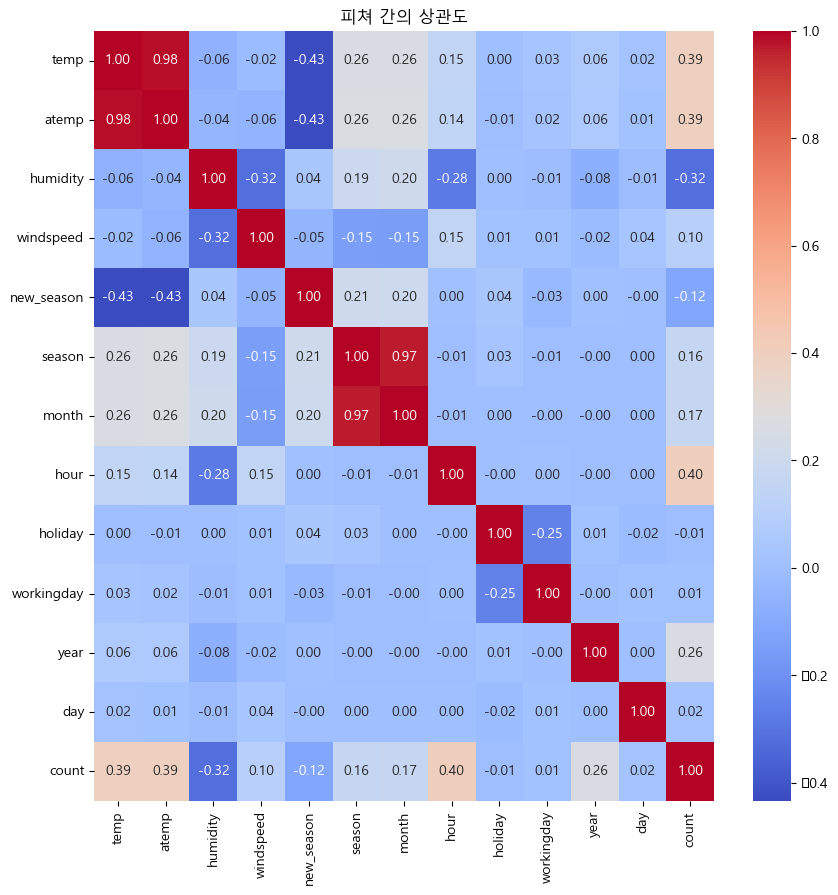

In [23]:
# 피쳐 간의 상관도를 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(bike_df[['temp', 'atemp', 'humidity', 'windspeed', 'new_season','season','month','hour','holiday','workingday','year','day','count']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('피쳐 간의 상관도')
plt.show()



In [24]:
# 실제 상관 관계 분석 시 계절이고 분기고 어차피 더 자세히 나온 month가 있었는데 둘다 삭제하자 라는 생각을 너무 늦게함. <-- 그냥 미세한 차이일뿐 같은 정보를 가지고 있음.
# 온도,체감온도,시간은 양의 상관계수를 가지고 있으며, 습도와 풍속은 음의 상관계수를 가지고 있다.
# 온도와 체감온도는 0.98로 매우 높은 상관도를 가지고 있으므로 하나의 피처는 삭제하는 것으로 보인다. 같은 이유로 season과 new_season도 삭제 
# 연도 정보는 연도별로 대여량이 증가하고 있으므로 유의미한 피처로 판단된다. 단순 작년대비 올해가 더 높다고 쉽게 판단하기 어려워보임.
# 휴일과 워킹데이 day 는 상관도가 매우 낮으므로 삭제하는 것이 좋아 보인다인다.


In [25]:
#필요 없는 열 제거
drop_columns = ['atemp','season','day','new_season','holiday','workingday','year']
bike_df.drop(drop_columns, axis=1,inplace=True)
#제거 후 확인
bike_df.head(3)

,weather,temp,humidity,windspeed,count,month,hour
0,1,9.84,81,0.0,16,1,0
1,1,9.02,80,0.0,40,1,1
2,1,9.02,80,0.0,32,1,2


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE(Root Mean Squared Logarithmic Error) 계산, 예측값과 실제값의 로그를 취한 후 제곱한 값의 평균을 계산하고 제곱근을 취하여 구함
# 로그 함수를 사용하여 비율을 계산하므로 상대적인 크기 차이가 작은 예측 오류에 민감하게 반응. 큰 오류를 상대적으로 덜 강조. 양수 값이 크게 다르고 정확한 예측보다는 상대적인 예측이 중요한 경우 적용
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

### 로그 변환, 피처 인코딩, 모델 학습/예측/평가

In [27]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 1.193, RMSE: 147.308, MAE: 108.734


In [28]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test,pred,n_tops=5)


      real_count  predicted_count   diff
1618         890            278.0  612.0
3151         798            196.0  602.0
966          884            283.0  601.0
412          745            150.0  595.0
2314         766            175.0  591.0


In [29]:
y_target.hist()

<Axes: >

In [30]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

<Axes: >

In [31]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.2, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타깃 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)


RMSLE: 1.056, RMSE: 168.824, MAE: 113.465


In [32]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.savefig('log_transform.tif', format='tif', dpi=300, bbox_inches='tight')

In [33]:
# 데이터 확인
#print(X_features.info())  # 데이터 타입 및 결측치 확인
print(X_features.describe())  # 통계 요약 확인
print(X_features.head())  # 데이터 샘플 확인

'''# 결측치 확인
print("결측치 개수:\n", X_features.isnull().sum())

# 데이터 크기 확인
print("데이터 크기:", X_features.shape)
print("타겟 크기:", y_target.shape)
print("타겟 데이터 타입:", type(y_target))  # y_target의 데이터 타입 확인'''

            weather         temp      humidity     windspeed         month  \
count  10886.000000  10886.00000  10886.000000  10886.000000  10886.000000   
mean       1.418427     20.23086     61.886460     12.799395      6.521495   
std        0.633839      7.79159     19.245033      8.164537      3.444373   
min        1.000000      0.82000      0.000000      0.000000      1.000000   
25%        1.000000     13.94000     47.000000      7.001500      4.000000   
50%        1.000000     20.50000     62.000000     12.998000      7.000000   
75%        2.000000     26.24000     77.000000     16.997900     10.000000   
max        4.000000     41.00000    100.000000     56.996900     12.000000   

               hour  
count  10886.000000  
mean      11.541613  
std        6.915838  
min        0.000000  
25%        6.000000  
50%       12.000000  
75%       18.000000  
max       23.000000  
   weather  temp  humidity  windspeed  month  hour
0        1  9.84        81        0.0      1    

'# 결측치 확인\nprint("결측치 개수:\n", X_features.isnull().sum())\n\n# 데이터 크기 확인\nprint("데이터 크기:", X_features.shape)\nprint("타겟 크기:", y_target.shape)\nprint("타겟 데이터 타입:", type(y_target))  # y_target의 데이터 타입 확인'

In [34]:
# 'month', 'hour','weather' 등의 피처들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=[ 'month', 'hour','weather'], drop_first=True)

In [35]:
X_features_ohe

,temp,humidity,windspeed,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_2,weather_3,weather_4
0,9.84,81,0.0000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,9.02,80,0.0000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9.02,80,0.0000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9.84,75,0.0000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9.84,75,0.0000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,50,26.0027,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
10882,14.76,57,15.0013,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
10883,13.94,61,15.0013,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
10884,13.94,61,6.0032,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [36]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)


### LinearRegression ###
RMSLE: 0.641, RMSE: 111.683, MAE: 72.210
### Ridge ###
RMSLE: 0.647, RMSE: 113.736, MAE: 73.091
### Lasso ###
RMSLE: 0.721, RMSE: 129.254, MAE: 83.292


In [37]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

<Axes: ylabel='None'>

In [38]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

models = [rf_reg, gbm_reg, xgb_reg, lgbm_reg]

for model in models:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    print(f"모델: {model.__class__.__name__}")
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

모델: RandomForestRegressor
### RandomForestRegressor ###
RMSLE: 0.685, RMSE: 114.562, MAE: 73.114
모델: GradientBoostingRegressor
### GradientBoostingRegressor ###
RMSLE: 0.652, RMSE: 109.703, MAE: 71.028
모델: XGBRegressor
### XGBRegressor ###
RMSLE: 0.714, RMSE: 124.438, MAE: 78.643
모델: LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 39
[LightGBM] [Info] Start training from score 4.582043
### LGBMRegressor ###
RMSLE: 0.643, RMSE: 109.783, MAE: 69.885


### 진행 시 오래 걸림 잘못눌렀을 때 방지해서 주석처리

In [39]:
'''from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 탐색
rf_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
best_rf_model = grid_search.best_estimator_
get_model_predict(best_rf_model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)'''

'from sklearn.model_selection import GridSearchCV\n\n# 하이퍼파라미터 그리드 설정\nparam_grid = {\n    \'n_estimators\': [100, 300, 500],\n    \'max_depth\': [10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\n# GridSearchCV를 사용하여 최적의 하이퍼파라미터 탐색\nrf_reg = RandomForestRegressor(random_state=42)\ngrid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=3, scoring=\'neg_mean_squared_error\', verbose=2)\ngrid_search.fit(X_train, y_train)\n\n# 최적의 하이퍼파라미터 출력\nprint("최적의 하이퍼파라미터:", grid_search.best_params_)\n\n# 최적의 모델로 예측\nbest_rf_model = grid_search.best_estimator_\nget_model_predict(best_rf_model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)'

최적의 하이퍼파라미터: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

In [40]:
# 최적의 하이퍼파라미터로 모델 생성
best_rf_model = RandomForestRegressor(
    max_depth=30,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)


In [41]:
# 모델 학습
best_rf_model.fit(X_train, y_train)

# 테스트 데이터에 대해 예측
y_pred = best_rf_model.predict(X_test)

# 로그 변환을 되돌림 (y_target_log를 사용한 경우)
import numpy as np
y_test_expm1 = np.expm1(y_test)  # 실제 값 복원
y_pred_expm1 = np.expm1(y_pred)  # 예측 값 복원

# 성능 평가 (RMSLE, RMSE, MAE 계산)
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test_expm1, y_pred_expm1))

# MAE 계산
mae = mean_absolute_error(y_test_expm1, y_pred_expm1)

# RMSLE 계산
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

rmsle_value = rmsle(y_test_expm1, y_pred_expm1)

# 결과 출력
print(f"최적 RandomForestRegressor의 RMSLE: {rmsle_value:.4f}")
print(f"최적 RandomForestRegressor의 RMSE: {rmse:.4f}")
print(f"최적 RandomForestRegressor의 MAE: {mae:.4f}")

최적 RandomForestRegressor의 RMSLE: 0.6700
최적 RandomForestRegressor의 RMSE: 112.3412
최적 RandomForestRegressor의 MAE: 72.1086


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# GradientBoostingRegressor 모델 생성
gbm_model = GradientBoostingRegressor(
    max_depth=30,
    min_samples_split=10,
    min_samples_leaf=2,
    n_estimators=300,
    learning_rate=0.1,  # 추가적인 하이퍼파라미터
    random_state=42
)

# 모델 학습
gbm_model.fit(X_train, y_train)

# 테스트 데이터에 대해 예측
y_pred_gbm = gbm_model.predict(X_test)

# 로그 변환을 되돌림
y_pred_gbm_expm1 = np.expm1(y_pred_gbm)
y_test_expm1 = np.expm1(y_test)

# 성능 평가 (RMSLE, RMSE, MAE 계산)

# RMSE 계산
rmse_gbm = np.sqrt(mean_squared_error(y_test_expm1, y_pred_gbm_expm1))

# MAE 계산
mae_gbm = mean_absolute_error(y_test_expm1, y_pred_gbm_expm1)

# RMSLE 계산
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

rmsle_gbm = rmsle(y_test_expm1, y_pred_gbm_expm1)

# 결과 출력
print(f"GradientBoostingRegressor의 RMSLE: {rmsle_gbm:.4f}")
print(f"GradientBoostingRegressor의 RMSE: {rmse_gbm:.4f}")
print(f"GradientBoostingRegressor의 MAE: {mae_gbm:.4f}")

GradientBoostingRegressor의 RMSLE: 0.7361
GradientBoostingRegressor의 RMSE: 121.2003
GradientBoostingRegressor의 MAE: 76.6622


In [43]:
from xgboost import XGBRegressor

# XGBRegressor 모델 생성
xgb_model = XGBRegressor(
    max_depth=30,  # 트리의 최대 깊이
    n_estimators=300,  # 생성할 트리의 개수
    learning_rate=0.1,  # 학습률
    objective='reg:squarederror',  # 회귀 문제에 적합한 설정
    random_state=42
)

# 모델 학습
xgb_model.fit(X_train, y_train)

# 테스트 데이터에 대해 예측
y_pred_xgb = xgb_model.predict(X_test)

# 로그 변환을 되돌림
y_pred_xgb_expm1 = np.expm1(y_pred_xgb)

# 성능 평가 (RMSLE, RMSE, MAE 계산)
rmse_xgb = np.sqrt(mean_squared_error(y_test_expm1, y_pred_xgb_expm1))
mae_xgb = mean_absolute_error(y_test_expm1, y_pred_xgb_expm1)
rmsle_xgb = rmsle(y_test_expm1, y_pred_xgb_expm1)

# 결과 출력
print(f"XGBRegressor의 RMSLE: {rmsle_xgb:.4f}")
print(f"XGBRegressor의 RMSE: {rmse_xgb:.4f}")
print(f"XGBRegressor의 MAE: {mae_xgb:.4f}")

XGBRegressor의 RMSLE: 0.7535
XGBRegressor의 RMSE: 121.9388
XGBRegressor의 MAE: 77.3155


In [44]:
from lightgbm import LGBMRegressor

# LGBMRegressor 모델 생성
lgbm_model = LGBMRegressor(
    max_depth=30,  # 트리의 최대 깊이
    n_estimators=300,  # 생성할 트리의 개수
    learning_rate=0.1,  # 학습률
    num_leaves=31,  # 리프 노드의 최대 개수
    random_state=42
)

# 모델 학습
lgbm_model.fit(X_train, y_train)

# 테스트 데이터에 대해 예측
y_pred_lgbm = lgbm_model.predict(X_test)

# 로그 변환을 되돌림
y_pred_lgbm_expm1 = np.expm1(y_pred_lgbm)

# 성능 평가 (RMSLE, RMSE, MAE 계산)
rmse_lgbm = np.sqrt(mean_squared_error(y_test_expm1, y_pred_lgbm_expm1))
mae_lgbm = mean_absolute_error(y_test_expm1, y_pred_lgbm_expm1)
rmsle_lgbm = rmsle(y_test_expm1, y_pred_lgbm_expm1)

# 결과 출력
print(f"LGBMRegressor의 RMSLE: {rmsle_lgbm:.4f}")
print(f"LGBMRegressor의 RMSE: {rmse_lgbm:.4f}")
print(f"LGBMRegressor의 MAE: {mae_lgbm:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 39
[LightGBM] [Info] Start training from score 4.582043
LGBMRegressor의 RMSLE: 0.6351
LGBMRegressor의 RMSE: 108.1972
LGBMRegressor의 MAE: 69.0566


In [45]:
from sklearn.ensemble import StackingRegressor
# 개별 모델 정의
rf_model = RandomForestRegressor(
    max_depth=30,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)

gbm_model = GradientBoostingRegressor(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    n_estimators=300,
    learning_rate=0.1,
    random_state=42
)

xgb_model = XGBRegressor(
    max_depth=10,
    n_estimators=300,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42
)

lgbm_model = LGBMRegressor(
    max_depth=10,
    n_estimators=300,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42
)

# 스태킹 앙상블 정의
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf_model),
        ('gbm', gbm_model),
        ('xgb', xgb_model),
        ('lgbm', lgbm_model)
    ],
    final_estimator=RandomForestRegressor(n_estimators=100, random_state=42)  # 메타 모델
)

# 스태킹 모델 학습
stacking_model.fit(X_train, y_train)

# 테스트 데이터에 대해 예측
y_pred_stacking = stacking_model.predict(X_test)

# 로그 변환을 되돌림
y_test_expm1 = np.expm1(y_test)  # 실제 값 복원
y_pred_stacking_expm1 = np.expm1(y_pred_stacking)  # 예측 값 복원

# 성능 평가 (RMSLE, RMSE, MAE 계산)
rmse_stacking = np.sqrt(mean_squared_error(y_test_expm1, y_pred_stacking_expm1))
mae_stacking = mean_absolute_error(y_test_expm1, y_pred_stacking_expm1)
rmsle_stacking = rmsle(y_test_expm1, y_pred_stacking_expm1)

# 결과 출력
print(f"StackingRegressor의 RMSLE: {rmsle_stacking:.4f}")
print(f"StackingRegressor의 RMSE: {rmse_stacking:.4f}")
print(f"StackingRegressor의 MAE: {mae_stacking:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 39
[LightGBM] [Info] Start training from score 4.582043
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 6096, number of used features: 39
[LightGBM] [Info] Start training from score 4.576078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RMSLE 계산 함수
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

# 예측 및 평가
y_pred = model.predict(X_test)
y_test_expm1 = np.expm1(y_test)  # 로그 변환 복원
y_pred_expm1 = np.expm1(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_expm1, y_pred_expm1))
mae = mean_absolute_error(y_test_expm1, y_pred_expm1)
rmsle_value = rmsle(y_test_expm1, y_pred_expm1)

print(f"RMSLE: {rmsle_value:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

RMSLE: 0.6433
RMSE: 109.7835
MAE: 69.8855


## 각 모델 별 성능 평가 결과 및 시각화

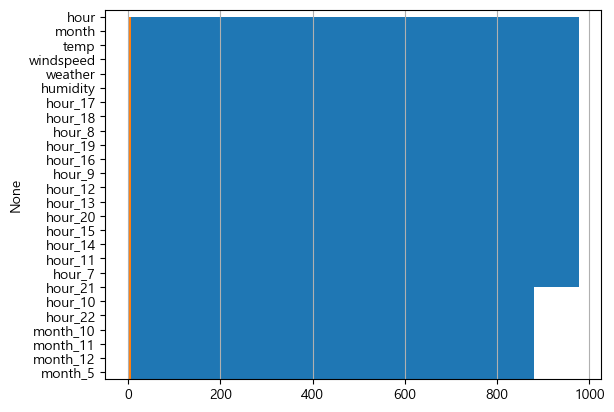

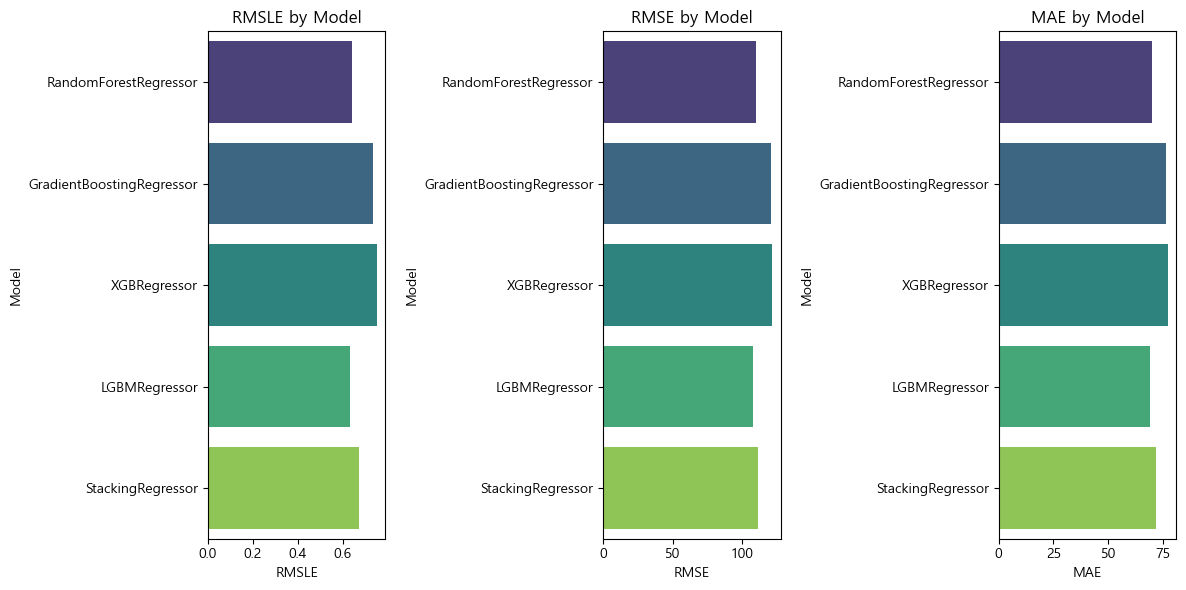

In [47]:
# 모델별 성능 평가 결과를 데이터프레임으로 정리
performance_data = {
    'Model': ['RandomForestRegressor', 'GradientBoostingRegressor', 'XGBRegressor', 'LGBMRegressor', 'StackingRegressor'],
    'RMSLE': [rmsle_value, rmsle_gbm, rmsle_xgb, rmsle_lgbm, rmsle_stacking],
    'RMSE': [rmse, rmse_gbm, rmse_xgb, rmse_lgbm, rmse_stacking],
    'MAE': [mae, mae_gbm, mae_xgb, mae_lgbm, mae_stacking]
}

performance_df = pd.DataFrame(performance_data)

# 성능 평가 결과 시각화
plt.figure(figsize=(12, 6))

# RMSLE 시각화
plt.subplot(1, 3, 1)
sns.barplot(x='RMSLE', y='Model', data=performance_df, hue='Model', dodge=False, legend=False, palette='viridis')
plt.title('RMSLE by Model')
plt.xlabel('RMSLE')
plt.ylabel('Model')

# RMSE 시각화
plt.subplot(1, 3, 2)
sns.barplot(x='RMSE', y='Model', data=performance_df, hue='Model', dodge=False, legend=False, palette='viridis')
plt.title('RMSE by Model')
plt.xlabel('RMSE')
plt.ylabel('Model')

# MAE 시각화
plt.subplot(1, 3, 3)
sns.barplot(x='MAE', y='Model', data=performance_df, hue='Model', dodge=False, legend=False, palette='viridis')
plt.title('MAE by Model')
plt.xlabel('MAE')
plt.ylabel('Model')

plt.tight_layout()
plt.show()

In [48]:
# 가장 낮은 RMSLE를 가진 모델 찾기
best_model_rmsle = performance_df.loc[performance_df['RMSLE'].idxmin()]
print(f"가장 낮은 RMSLE를 가진 모델: {best_model_rmsle['Model']}")
print(f"RMSLE: {best_model_rmsle['RMSLE']:.4f}, RMSE: {best_model_rmsle['RMSE']:.4f}, MAE: {best_model_rmsle['MAE']:.4f}")

# 가장 낮은 RMSE를 가진 모델 찾기
best_model_rmse = performance_df.loc[performance_df['RMSE'].idxmin()]
print(f"가장 낮은 RMSE를 가진 모델: {best_model_rmse['Model']}")
print(f"RMSLE: {best_model_rmse['RMSLE']:.4f}, RMSE: {best_model_rmse['RMSE']:.4f}, MAE: {best_model_rmse['MAE']:.4f}")

# 가장 낮은 MAE를 가진 모델 찾기
best_model_mae = performance_df.loc[performance_df['MAE'].idxmin()]
print(f"가장 낮은 MAE를 가진 모델: {best_model_mae['Model']}")
print(f"RMSLE: {best_model_mae['RMSLE']:.4f}, RMSE: {best_model_mae['RMSE']:.4f}, MAE: {best_model_mae['MAE']:.4f}")

가장 낮은 RMSLE를 가진 모델: LGBMRegressor
RMSLE: 0.6351, RMSE: 108.1972, MAE: 69.0566
가장 낮은 RMSE를 가진 모델: LGBMRegressor
RMSLE: 0.6351, RMSE: 108.1972, MAE: 69.0566
가장 낮은 MAE를 가진 모델: LGBMRegressor
RMSLE: 0.6351, RMSE: 108.1972, MAE: 69.0566


In [54]:
from lightgbm import LGBMRegressor

# LGBMRegressor 모델 생성
lgbm_model = LGBMRegressor(
    max_depth=10,
    n_estimators=300,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42
)

# 모델 학습
lgbm_model.fit(X_train, y_train)  # 학습 데이터로 모델 학습

# 테스트 데이터 불러오기
test = pd.read_csv('test.csv')

# datetime 열 별도로 저장
datetime_col = test['datetime']  # 제출 파일 생성 시 사용

# 테스트 데이터 전처리
test['year'] = pd.to_datetime(test['datetime']).dt.year
test['month'] = pd.to_datetime(test['datetime']).dt.month
test['day'] = pd.to_datetime(test['datetime']).dt.day
test['hour'] = pd.to_datetime(test['datetime']).dt.hour
test['dayofweek'] = pd.to_datetime(test['datetime']).dt.dayofweek

# 필요 없는 열 제거 (datetime 열 제거)
test = test.drop(['datetime'], axis=1)

# One-Hot Encoding 적용 (학습 데이터와 동일한 열 구조 유지)
test_ohe = pd.get_dummies(test, columns=['season', 'weather', 'month', 'hour', 'dayofweek'], drop_first=True)

# 학습 데이터와 동일한 열 구조로 맞추기
missing_cols = set(X_features_ohe.columns) - set(test_ohe.columns)
for col in missing_cols:
    test_ohe[col] = 0  # 없는 열은 0으로 채움
test_ohe = test_ohe[X_features_ohe.columns]  # 열 순서 맞추기

# 가장 낮은 RMSLE를 가진 모델(LGBMRegressor)로 예측
pred = lgbm_model.predict(test_ohe)

# 로그 변환을 되돌림
pred_expm1 = np.expm1(pred)

# 제출파일 count 실수형 -> 정수형
pred_expm1 = np.round(pred_expm1).astype(int)

# 제출 파일 생성 (datetime 열 다시 붙이기)
submission = pd.DataFrame({'datetime': datetime_col, 'count': pred_expm1})
submission.to_csv('submission.csv', index=False)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 39
[LightGBM] [Info] Start training from score 4.582043
